### 1.1 -  Load Random Numbers

In [2]:
# Load random numbers for part 1

from matplotlib import pyplot as plt
import numpy as np
import math

plt.rcParams.update({'font.size': 12})

uniform_rng_file = "./rng/random.out"
r = np.loadtxt(uniform_rng_file)

### 1.1 - Integrate $\langle r \rangle = \int_0^1 r dr$

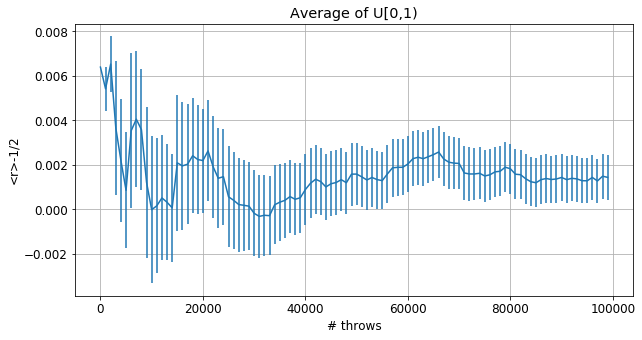

In [3]:
# First Integral


def error(AV, AV2, n):
    if n == 0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)


M = 100000     # Throws
N = 100        # Blocks (~ Experiments)
L = int(M/N)   # Rolls per block

ave = np.zeros(N)  # Measurements for each block
av2 = np.zeros(N)
sum_prog = np.zeros(N)  # Cumulative averages and error
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

# r = array of uniformly distributed random numbers

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L        # linear index for r
        sum += r[k]
    ave[i] = sum/L
    av2[i] = (ave[i])**2

# Cumulative blocked statistics
for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j]  # SUM_{j=0,i} r_j, cumulative sum of averages
        su2_prog[i] += av2[j]  # SUM_{j=0,i} (r_j)^2
    sum_prog[i] /= (i+1)  # Cumulative average (divided by number of blocks)
    su2_prog[i] /= (i+1)  # Cumulative square average
    err_prog[i] = error(sum_prog, su2_prog, i)  # Statistical uncertainty

# Plot (experimental value - expected value) with error bars
x = np.arange(N)
x *= L                       # coordinates of each error bar
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, sum_prog-0.5, yerr=err_prog)
plt.xlabel('# throws')
plt.ylabel('<r>-1/2')
plt.title('Average of U[0,1)')
# plt.savefig("./figures/1.1.1.png")
plt.show()

### 1.2 - Integrate $\sigma^2 = \int_0^1 (r-1/2)^2 dr$

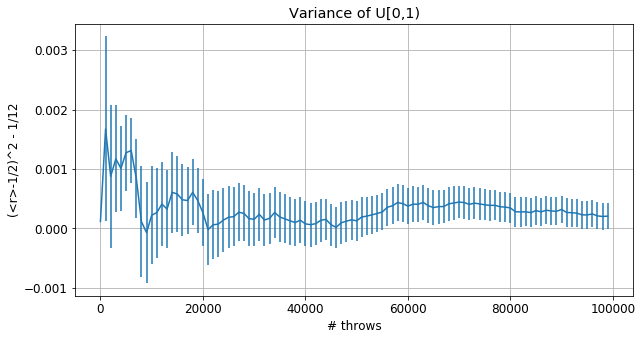

In [4]:
# Second Integral

M = 100000     # Throws
N = 100        # Blocks
L = int(M/N)   # Rolls per block
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

# r = array of uniformly distributed random numbers

# Integral
for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += (r[k]-0.5)**2  # Integrand
    ave[i] = sum/L
    av2[i] = (ave[i])**2

# Cumulative statistics as number of blocks increases
for i in range(N):  # {0,1,...,N}
    for j in range(i+1):      # j is {0}, {1,2}, {1,2,3},...
        sum_prog[i] += ave[j]  # SUM_{j=0,i} r_j, cumulative sum of averages
        su2_prog[i] += av2[j]  # SUM_{j=0,i} (r_j)^2
    sum_prog[i] /= (i+1)  # Cumulative average (divided by number of blocks)
    su2_prog[i] /= (i+1)  # Cumulative square average
    err_prog[i] = error(sum_prog, su2_prog, i)  # Statistical uncertainty

# Plot (experimental value - expected value)
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, sum_prog-1/12, yerr=err_prog)
plt.xlabel('# throws')
plt.ylabel('(<r>-1/2)^2 - 1/12')
plt.title("Variance of U[0,1)")
# plt.savefig("./figures/1.1.2.png")
plt.show()

### 1.3 - Run Chi Squared Test

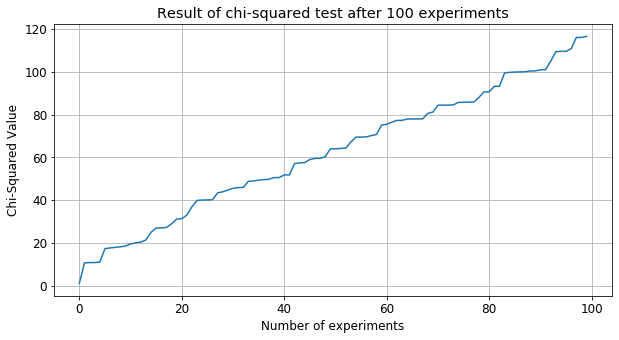

In [5]:
# Chi Squared Test

M = 1000000   # Throws = 100 * 10.000
N = 100       # Blocks
L = int(M/N)  # Throws/Block
n = int(L/N)  # Expected outcome

chi2_sum = 0
chi2_prog = np.zeros(N)

# r = array of random numbers

# Cumulative chi squared test
for i in range(N):
    count = 0
    for j in range(L):
        k = j+i*L
        if ((i/N <= r[k]) and (r[k] < ((i+1)/N))):  # r_k in [i/N, i+1 / N)
            count += 1

    # chi2 = sum (Oi - Ei)^2 / Ei
    chi2_sum += ((count - n)**2 / n)
    chi2_prog[i] = chi2_sum

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(chi2_prog)
plt.ylabel("Chi-Squared Value")
plt.xlabel("Number of experiments")
plt.title('Result of chi-squared test after {} experiments'.format(N))
plt.grid(True)
# plt.savefig("./figures/1.1.3.png")
plt.show()

### 1.2 - Test The Central Limit Theorem for Uniform, Exponential, and Cauchy Distributions

In [6]:
# Central Limit theorem -- Functions and Random Numbers

from scipy.stats import norm
from scipy.stats import cauchy


def sum_distribution(R, M, N):
    '''
    Averages M numbers in R, N times
    '''

    sums = np.zeros(N)
    for i in range(N):
        for j in range(M):
            k = j + i*M
            sums[i] += R[k]
        sums[i] /= M
    return sums

# Load random numbers
N = 1000000
M = 10000

uni_file = "./rng/random.out"
lor_file = "./rng/random_lor.out"
exp_file = "./rng/random_exp.out"
r_uni = np.loadtxt(uni_file, max_rows=N)
r_lor = np.loadtxt(lor_file, max_rows=N)
r_exp = np.loadtxt(exp_file, max_rows=N)

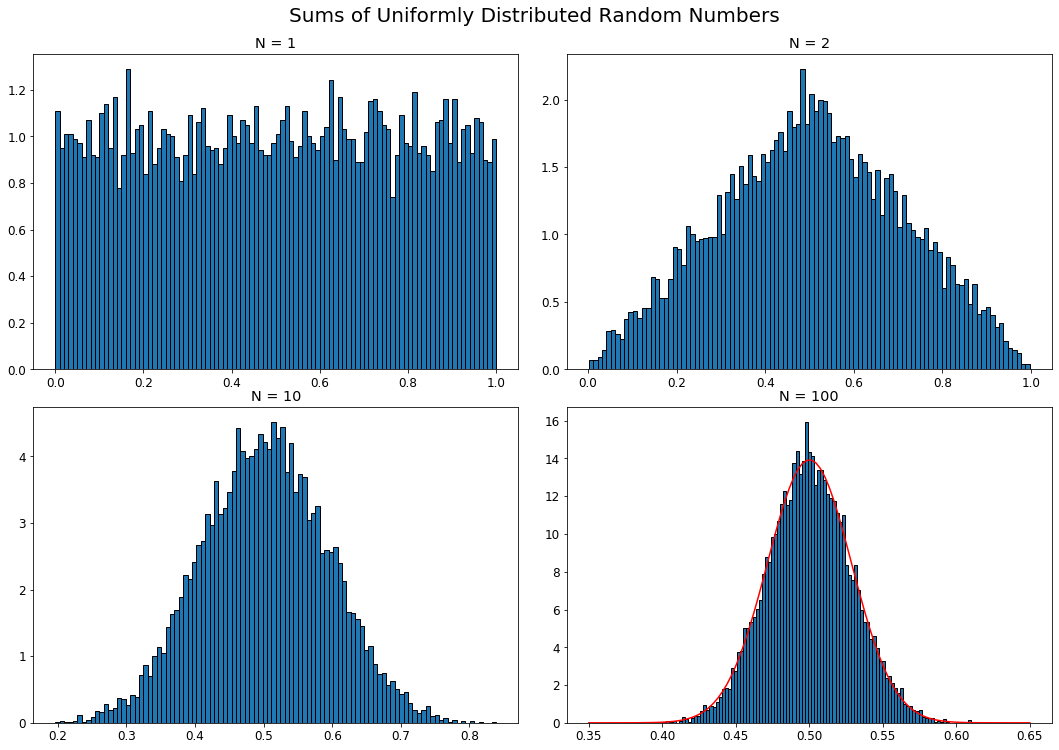

In [8]:
# Uniform Distribution with CLT Test

sum_uni_1 = sum_distribution(r_uni, 1, M)
sum_uni_2 = sum_distribution(r_uni, 2, M)
sum_uni_10 = sum_distribution(r_uni, 10, M)
sum_uni_100 = sum_distribution(r_uni, 100, M)

plt.rcParams.update({"figure.titlesize": 20})

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.tight_layout()
fig.suptitle("Sums of Uniformly Distributed Random Numbers", y=1.04)

axes[0, 0].hist(sum_uni_1, bins=100, ec='black', density=True)
axes[0, 0].title.set_text("N = 1")

axes[0, 1].hist(sum_uni_2, bins=100, ec='black', density=True)
axes[0, 1].title.set_text("N = 2")

axes[1, 0].hist(sum_uni_10, bins=100, ec='black', density=True)
axes[1, 0].title.set_text("N = 10")

axes[1, 1].hist(sum_uni_100, bins=100, ec='black', density=True)
axes[1, 1].title.set_text("N = 100")


data = sum_uni_100
mean, std_dev = norm.fit(data)
x = np.linspace(0.35, 0.65, 100)
gauss_fit = norm.pdf(x, mean, std_dev)
axes[1, 1].plot(x, gauss_fit, color='red')
plt.show()

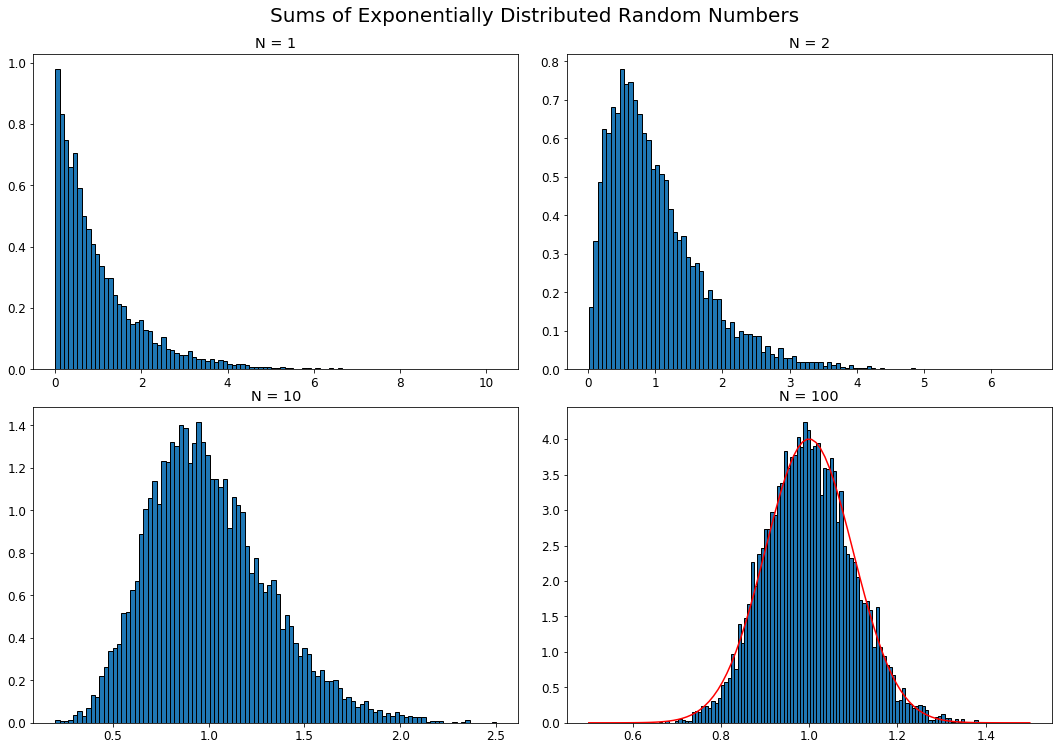

In [11]:
# Exponential Distribution with CLT Test

sum_exp_1 = sum_distribution(r_exp, 1, M)
sum_exp_2 = sum_distribution(r_exp, 2, M)
sum_exp_10 = sum_distribution(r_exp, 10, M)
sum_exp_100 = sum_distribution(r_exp, 100, M)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Sums of Exponentially Distributed Random Numbers", y=1.04)
plt.tight_layout()

axes[0, 0].hist(sum_exp_1, bins=100, ec='black', density=True)
axes[0, 0].title.set_text("N = 1")
axes[0, 1].hist(sum_exp_2, bins=100, ec='black', density=True)
axes[0, 1].title.set_text("N = 2")
axes[1, 0].hist(sum_exp_10, bins=100, ec='black', density=True)
axes[1, 0].title.set_text("N = 10")
axes[1, 1].hist(sum_exp_100, bins=100, ec='black', density=True)
axes[1, 1].title.set_text("N = 100")

data = sum_exp_100
mean, std_dev = norm.fit(data)
x = np.linspace(0.5, 1.5, 100)
gauss_fit = norm.pdf(x, mean, std_dev)
axes[1, 1].plot(x, gauss_fit, color='red')
plt.show()

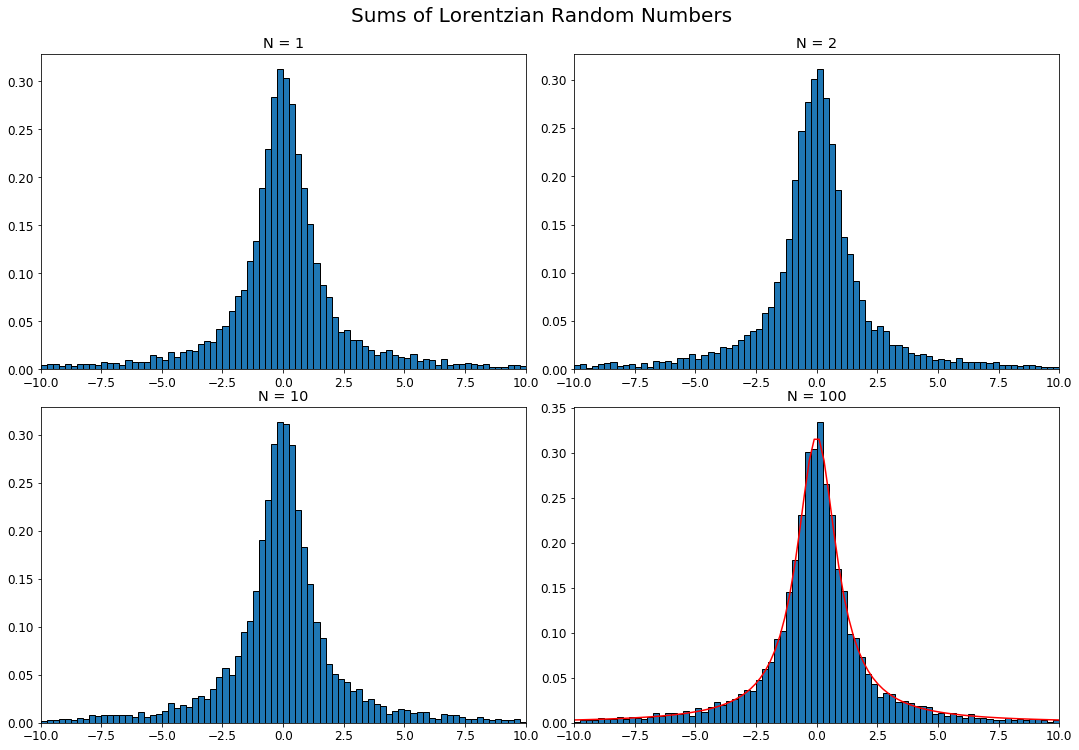

In [10]:
# The Cauchy-Lorentz Distribution, a stable distribution

sum_lor_1 = np.clip(sum_distribution(r_lor, 1, M), -25, 25)
sum_lor_2 = np.clip(sum_distribution(r_lor, 2, M), -25, 25)
sum_lor_10 = np.clip(sum_distribution(r_lor, 10, M), -25, 25)
sum_lor_100 = np.clip(sum_distribution(r_lor, 100, M), -25, 25)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Sums of Lorentzian Random Numbers", y=1.04)
plt.tight_layout()

axes[0, 0].hist(sum_lor_1, bins=200, ec='black', density=True)
axes[0, 0].title.set_text("N = 1")
axes[0, 0].set_xlim([-10, 10])

axes[0, 1].hist(sum_lor_2, bins=200, ec='black', density=True)
axes[0, 1].title.set_text("N = 2")
axes[0, 1].set_xlim([-10, 10])

axes[1, 0].hist(sum_lor_10, bins=200, ec='black', density=True)
axes[1, 0].title.set_text("N = 10")
axes[1, 0].set_xlim([-10, 10])

axes[1, 1].hist(sum_lor_100, bins=200, ec='black', density=True)
axes[1, 1].title.set_text("N = 100")
axes[1, 1].set_xlim([-10, 10])

# Is this a true fit? I'm not using any parameters...

x = np.linspace(-10, 10, 100)
cauchy_fit = cauchy.pdf(x)
axes[1, 1].plot(x, cauchy_fit, color='red')

plt.show()

### 1.3 - Simulate the Buffon Experiment 

In [2]:
# Buffon Experiment -- Functions

from IPython.display import clear_output  # For progress reporting


def make_pi(hits, N, d, L):
    if (hits == 0):
        return 0
    else:
        return 2*L*N/(hits*d)


def get_needle(X, Y, T, L):

    needle = np.ndarray(shape=(2, 2))

    needle[0][0] = X
    needle[0][1] = Y
    needle[1][0] = X + L*np.cos(T)
    needle[1][1] = Y + L*np.sin(T)

    return needle


def count_intersections(needle, G, d):

    y1 = needle[0][1]
    y2 = needle[1][1]
    ends = [min(y1, y2), max(y1, y2)]

    count = 0

    for k in np.arange(0, G+d, d):
        if (k > ends[0] and k < ends[1]):
            count += 1

    return count


def error(AV, AV2, n):
    if n == 0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

In [9]:
# Buffon Experiment -- Test Run

N = 5000  # Needles
G = 50    # Grid size
d = 10    # Grid spacing
L = d/2   # Needle length

uni_file = "./rng/random.out"
theta_file = "./rng/random_theta.out"

t = np.loadtxt(theta_file, max_rows=N)
r = np.loadtxt(uni_file, max_rows=N*2)

x = G*r[0:N]
y = G*r[N:2*N]

count = 0
for i in range(N):
    needle = get_needle(x[i], y[i], t[i], L)
    count += count_intersections(needle, G, d)
    
print(make_pi(count, N, d, L))

3.125


In [15]:
# Buffon experiment -- Load Random Numbers

# Parameters
M = 500000      # Total number of throws (needles)
N = 100         # Number of blocks
T = int(M/N)    # Number of throws per block

G = 50    # Grid sidelength
d = 10    # Gridline separation
L = d/2   # Needle length

pi_estimate = np.zeros(N)
pi2_estimate = np.zeros(N)

# Random Numbers:
uni_file = "./rng/random.out"  # 5e5 for y + 5e5 for x = 1e6 total
theta_file = "./rng/random_theta.out"

t = np.loadtxt(theta_file, max_rows=M)
r = np.loadtxt(uni_file, max_rows=M*2)

x = G*r[0:M]
y = G*r[M:2*M]

In [16]:
# Buffon Experiment -- Run

for i in range(N):  # block

    count = 0
    clear_output(wait=True)
    print("Progress:", int(i/N*100), '% ...')

    for j in range(T):  # experiment
        k = j+i*T
        needle = get_needle(x[k], y[k], t[k], L)  # "drop" the needle
        # check if it intersects a gridline
        count += count_intersections(needle, G, d)

    pi_estimate[i] = make_pi(count, T, d, L)  # result
    pi2_estimate[i] = pi_estimate[i]**2

clear_output(wait=True)
print("Progress: 100%!")

Progress: 100%!


Final estimate for pi: 3.148479 +/- 0.006844 ( 0.217375 % )


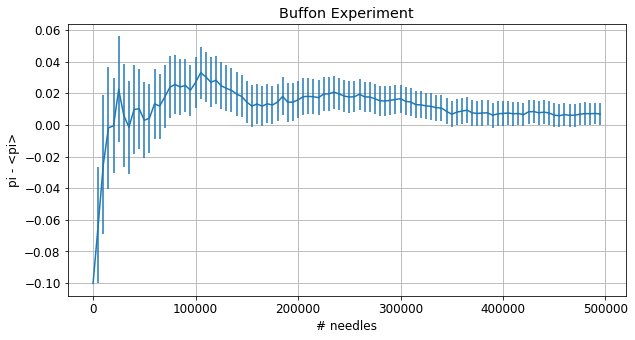

In [15]:
# Buffon Experiment -- Statistics

sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N):  # Blocks
    for j in range(i+1):
        sum_prog[i] += pi_estimate[j]
        su2_prog[i] += pi2_estimate[j]
    sum_prog[i] /= (i+1)
    su2_prog[i] /= (i+1)
    err_prog[i] = error(sum_prog, su2_prog, i)

# Buffon Experiment -- Plot

pi_result = round(sum_prog[N-1], 6)
pi_error = round(err_prog[N-1], 6)
pi_perror = round(pi_error/pi_result * 100, 6)
print('Final estimate for pi:', pi_result,
      '+/-', pi_error, '(', pi_perror, '% )')

x = np.arange(N)
x *= T
plt.figure(figsize=(10, 5))
plt.errorbar(x, sum_prog-np.pi, yerr=err_prog)
plt.xlabel('# needles')
plt.ylabel('pi - <pi>')
plt.title("Buffon Experiment")
plt.grid(True)
# plt.savefig("./figures/pi.png")